In [11]:
import deblend
import om10
import desc.slrealizer
import warnings
warnings.filterwarnings("ignore")

In [12]:
db = om10.DB()
db.select_random(maglim=23.3,area=18000.0,IQ=0.75)
db.paint(synthetic=True)
realizer = desc.slrealizer.SLRealizer(catalog=db, observation="../../../data/twinkles_observation_history.csv")

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: selection yields 2813 lenses


In [13]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


In [14]:
# Choose a good lens system, with large imsep and 4 images:
                      
wide = db.sample[np.where(db.sample['IMSEP'] > 1.0)]
print "Number of lenses with image separation > 1.0 arcsec = ",len(wide)

wide_quads = wide[np.where(wide['NIMG'] == 4)]
print "Number of these with 4 images = ",len(wide_quads)

bright_wide_quads = wide[np.where(wide_quads['MAGI'] < 22)]
print "Number of these with i3 < 22 = ",len(bright_wide_quads)

db.sample = bright_wide_quads    
                      
k = db.sample[0]['LENSID']

Number of lenses with image separation > 1.0 arcsec =  1932
Number of these with 4 images =  283
Number of these with i3 < 22 =  122


OM10: Extracted OM10 lens number 78651307:
 LENSID  FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
-------- -------- ---- ----- ... ------------- ------------- -------------
78651307        0    2 1.586 ...         20.65 20.6149036409 24.2663960484
galaxy_x, galaxy_y, PSF_HWHM:
multiplication factor :  2.2795583809e-08
1.86192636615
PSF_sigma:  0.949096
currLensX:  1.0829 currLensY:  -0.2029
multiplication factor :  1.86192636615
19.3667778106
PSF_sigma:  0.949096
currLensX:  -0.1173 currLensY:  0.0159
multiplication factor :  19.3667778106
#####################BEFORE DEBLEND PLOT LENSES##################################


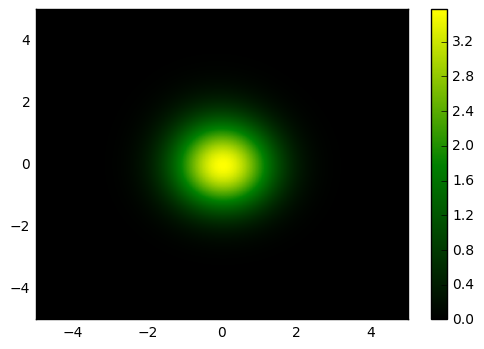

This is the covariance I calculated:  [[  9046.09967994   -210.10527175]
 [  -210.10527175  10159.96499586]]
This is the eigenvalue I have (array([  9007.78599333,  10198.27868247]), array([[-0.98377688, -0.17939635],
       [-0.17939635,  0.98377688]]))
standard deviation is:  94.9093567217
standard deviation is:  100.986527232


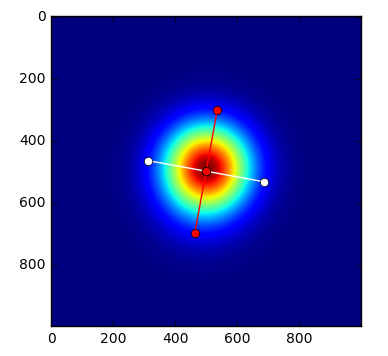

**************zeroth moment:  212286.62886
**************first moment:  -0.00329016840458 -0.0120410625022
**************second moment:  [[  9046.09967994   -210.10527175]
 [  -210.10527175  10159.96499586]]
#####################PRINTING NULL DEBLENDER'S PLOT###############################


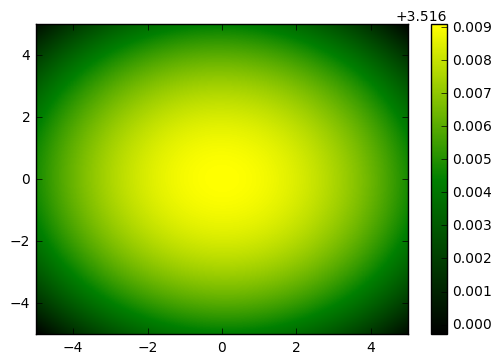

###############################################################################
('chi squared: ', 0.001278527390192608, 'p: ', 1.0)
('Chi squared distance is : ', (0.001278527390192608, 1.0))
('KL distance is : ', 5.8364352026382607)


In [15]:
realizer.deblend(lensID=k, version=1, null_deblend=True, debug=True, show_plot=True)

OM10: Extracted OM10 lens number 78651307:
 LENSID  FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
-------- -------- ---- ----- ... ------------- ------------- -------------
78651307        0    2 1.586 ...         20.65 20.6149036409 24.2663960484
galaxy_x, galaxy_y, PSF_HWHM:
multiplication factor :  7.76946158285e-07
1.86192636615
PSF_sigma:  1.177236
currLensX:  1.0829 currLensY:  -0.2029
multiplication factor :  1.86192636615
19.3667778106
PSF_sigma:  1.177236
currLensX:  -0.1173 currLensY:  0.0159
multiplication factor :  19.3667778106
#####################BEFORE DEBLEND PLOT LENSES##################################


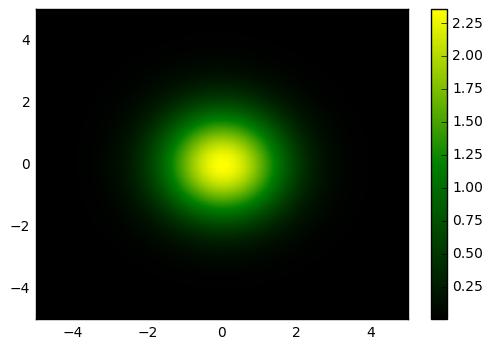

**************zeroth moment:  212269.485872


NameError: global name 'first_moment' is not defined

In [16]:
realizer.deblend(lensID=k, version=2, null_deblend=True, debug=True, show_plot=True)